In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
#Reading excel file
df = pd.read_excel("D:\SIT\Y3T1\Data Analytics\Project 2\experiment3.xlsx")
df

,dx,fa,fca,fm,fod,fstd,kpr,kts,ra,re,skew,sod,sre,std,thp,vf,measured_wearout
0,-0.003068,2.765610,0.998534,2.776655,0.000552,0.351196,2.542402e-08,2.084686,1.014783,0.000503,0.644696,0.000552,0.000083,0.877226,7.298533,0.000362,0.000008
1,-0.006136,2.764382,0.998939,2.774814,0.000405,0.354718,-3.329749e-04,2.083529,1.015013,0.000420,0.643646,-0.000147,0.000083,0.877522,7.315627,0.000393,0.000016
2,0.001227,2.761314,0.999080,2.771746,0.000141,0.352898,-5.575931e-04,2.080117,1.014566,0.000158,0.641857,-0.000264,0.000082,0.878065,7.339578,0.000129,0.000024
3,-0.005523,2.761928,0.999786,2.772359,0.000706,0.354042,1.115417e-04,2.078988,1.013218,0.000716,0.641469,0.000565,0.000084,0.878270,7.360829,0.000503,0.000032
4,-0.003682,2.758860,1.000019,2.769905,0.000233,0.355346,-4.408834e-04,2.077771,1.012779,0.000276,0.641041,-0.000472,0.000090,0.878795,7.384117,0.000276,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56795,0.020250,6.562724,2.710383,6.579291,0.000411,0.674624,1.396514e-04,1.459793,1.007202,0.000393,0.334613,0.000779,0.000173,2.366808,1.679402,0.000098,0.558225
56796,0.012273,6.573155,2.709941,6.589109,-0.000442,0.675668,7.514327e-04,1.461127,1.007383,-0.000310,0.334743,-0.000853,0.000200,2.369662,1.684676,-0.000755,0.558243
56797,0.015954,6.579905,2.710494,6.594632,0.000552,0.675906,4.214056e-04,1.460708,1.007561,0.000374,0.336240,0.000994,0.000227,2.370635,1.672221,-0.001012,0.558262
56798,0.031295,6.587882,2.711911,6.602609,0.001417,0.676540,6.051475e-04,1.461963,1.008667,0.001897,0.337477,0.000865,0.000202,2.371401,1.691393,-0.000245,0.558281


In [2]:
#Checking for null values in dataset
df.isnull().sum()

dx                  0
fa                  0
fca                 0
fm                  0
fod                 0
fstd                0
kpr                 0
kts                 0
ra                  0
re                  0
skew                0
sod                 0
sre                 0
std                 0
thp                 0
vf                  0
measured_wearout    0
dtype: int64

In [3]:
#for statistical anaylsis
df.describe()

,dx,fa,fca,fm,fod,fstd,kpr,kts,ra,re,skew,sod,sre,std,thp,vf,measured_wearout
count,56800.000000,56800.000000,56800.000000,56800.000000,56800.000000,56800.000000,5.680000e+04,56800.000000,56800.000000,56800.000000,56800.000000,5.680000e+04,56800.000000,56800.000000,56800.000000,56800.000000,56800.000000
mean,0.000117,4.742175,1.731286,4.752098,-0.000005,0.509466,6.618498e-06,1.897367,1.011477,0.000009,0.588713,-2.463144e-08,0.000112,1.577944,9.535204,-0.000061,0.209802
std,0.008759,1.299994,0.587897,1.301152,0.001025,0.116430,4.263536e-04,0.352288,0.003843,0.001232,0.176921,8.083723e-04,0.000072,0.515082,5.825404,0.000811,0.147267
min,-0.084067,2.725724,0.960901,2.731247,-0.011917,0.343492,-4.605416e-03,1.420510,1.002522,-0.013843,0.288390,-5.258770e-03,0.000008,0.869900,1.215477,-0.004351,0.000008
25%,-0.004295,3.789597,1.253249,3.797574,-0.000485,0.402218,-2.248671e-04,1.569782,1.008684,-0.000605,0.430594,-5.277178e-04,0.000069,1.210615,4.470789,-0.000565,0.112002
50%,0.000000,4.437125,1.554255,4.449398,0.000018,0.513628,9.267052e-09,1.894907,1.010945,0.000039,0.577720,-2.114711e-17,0.000097,1.412782,8.372185,-0.000049,0.157503
75%,0.004295,5.800600,2.204998,5.811032,0.000497,0.554160,2.616434e-04,2.153543,1.013685,0.000655,0.702960,5.338541e-04,0.000134,1.996416,15.479477,0.000454,0.320704
max,0.074862,8.182694,3.104693,8.201103,0.008155,0.833016,5.385025e-03,2.490851,1.039846,0.008861,0.896697,5.019456e-03,0.000994,2.824537,25.904634,0.003657,0.558300


In [4]:
#Multi-Linear Regression

In [5]:
#Prepare input X and output y
X = df.iloc[:,0:16]
y = df['measured_wearout']
#transform the features to standard scaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
print(X_scaled_data)
# Split the data into training/testing sets
#split data into 80% training, 20% testing randomly
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size = 0.2, random_state=42)
y_test

[[-0.36360573 -1.52045595 -1.24640536 ... -1.36041458 -0.3839546
   0.52173173]
 [-0.71389313 -1.52139989 -1.24571642 ... -1.35983935 -0.38102025
   0.55956795]
 [ 0.12679664 -1.52376008 -1.24547634 ... -1.35878665 -0.37690873
   0.23417663]
 ...
 [ 1.80817616  1.41365742  1.66562587 ...  1.53897581 -1.34978646
  -1.17333001]
 [ 3.55961297  1.41979365  1.66803685 ...  1.54046258 -1.34649533
  -0.227425  ]
 [ 5.17093525  1.43159443  1.66708702 ...  1.54447383 -1.33965138
  -0.227425  ]]


18794    0.126723
4475     0.035304
15695    0.116794
40055    0.271253
7822     0.061703
           ...   
6735     0.053129
38791    0.246685
56379    0.550373
18129    0.124593
30645    0.171419
Name: measured_wearout, Length: 11360, dtype: float64

In [6]:
#build up multiple linear regrerssion model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
# model coefficients
print("Coefficients: ", np.round(model.coef_, 2))
# model intercept
print("intercept: ", np.round(model.intercept_,2))

Coefficients:  [ 0.   -0.39  0.36  0.4   0.    0.1  -0.   -0.06 -0.   -0.    0.08 -0.
  0.   -0.3  -0.03 -0.  ]
intercept:  0.21


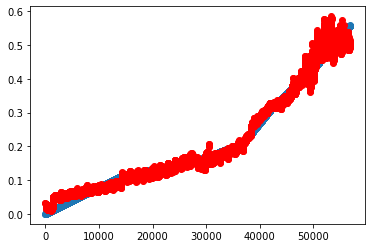

In [7]:
# model estimate
y_pred = model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red');

<Figure size 3600x288 with 0 Axes>

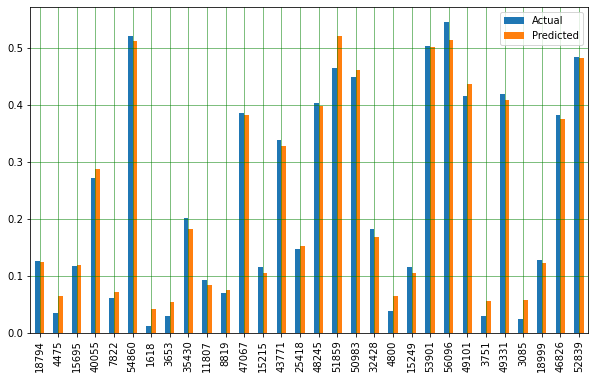

In [8]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

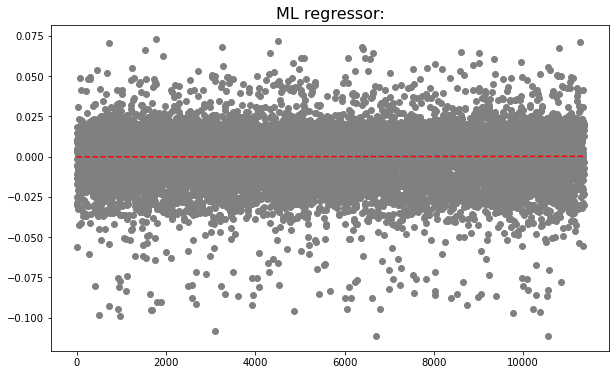

In [9]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")
#plt.plot(index_list, y_pred, c="red", marker='o', linestyle='',markersize=2)
plt.show()

In [10]:
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

r2:  0.9845
MAE:  0.0139
MSE:  0.0003
RMSE:  0.0183


(1.0, 16.0)

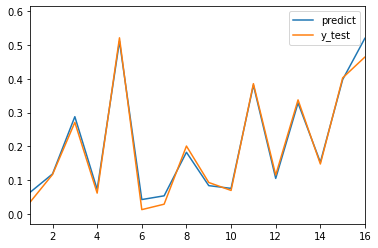

In [11]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [12]:
#Polynomial Regression (Random State = 42)

In [13]:
#Prepare input X and output y
X = df.iloc[:,0:16]
y = df['measured_wearout']
scaler = StandardScaler()
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
print(poly_features[:10])
#prepare training and testing set
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

[[-3.06812700e-03  2.76560950e+00  9.98534140e-01 ...  5.32685840e+01
   2.64235330e-03  1.31072209e-07]
 [-6.13625390e-03  2.76438240e+00  9.98939160e-01 ...  5.35183926e+01
   2.87299471e-03  1.54229195e-07]
 [ 1.22725080e-03  2.76131420e+00  9.99080300e-01 ...  5.38694008e+01
   9.45787744e-04  1.66052424e-08]
 ...
 [-1.10452570e-02  2.75149630e+00  1.00043640e+00 ...  5.53976714e+01
   4.20181448e-03  3.18700128e-07]
 [-3.68175240e-03  2.74597360e+00  1.00016640e+00 ...  5.55143908e+01
   3.47471914e-03  2.17487266e-07]
 [ 2.39313900e-02  2.74413280e+00  9.99877990e-01 ...  5.57439558e+01
   1.32861814e-03  3.16666830e-08]]


In [14]:
#Creating Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
print("Intercept: %.2f" % poly_reg_model.intercept_)
print("model coefficient:")
print(poly_reg_model.coef_.round(2))
#Model Estimation
poly_reg_y_predicted = poly_reg_model.predict(X_test)
#x2^2 and x1x2 like not impt very small

Intercept: 6.46
model coefficient:
[-1.64000e+00  1.40000e+01 -2.66000e+00 -1.55400e+01 -4.88900e+01
  3.98000e+00 -1.95300e+01 -2.27000e+00 -8.99000e+00  3.65100e+01
  2.21000e+00  1.96000e+01 -4.17670e+02  5.72000e+00  3.00000e-02
  1.90200e+01  2.90000e-01  7.80000e-01 -4.20000e-01 -8.30000e-01
 -6.53200e+01  8.00000e-02 -2.36400e+01  5.30000e-01  1.41000e+00
  4.31500e+01 -1.34000e+00  1.02600e+01  4.85700e+01  5.40000e-01
  1.00000e-02  7.50000e+00  1.91000e+00 -2.16000e+00 -3.03000e+00
  3.04120e+02 -6.40000e-01  7.86000e+00  1.82000e+00 -1.30400e+01
 -2.37890e+02 -6.84000e+00 -9.47500e+01 -3.55250e+02  1.10000e-01
  4.00000e-02  1.88500e+01 -3.12000e+00  2.01000e+00 -1.08100e+01
 -1.12200e+01 -7.90000e+00  1.09900e+01 -8.11000e+00  4.54000e+00
 -1.57100e+01  8.27000e+00 -1.11858e+03  1.12900e+01 -7.00000e-02
 -3.66000e+00  9.90000e-01 -3.14470e+02  7.90000e-01 -5.95000e+00
 -6.60000e-01  1.36200e+01  2.43300e+02  4.93000e+00  9.81900e+01
  4.07840e+02  7.90000e-01 -4.00000e-02 -

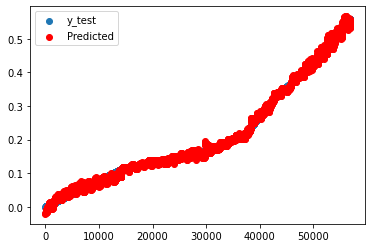

In [15]:
# model estimate
y_pred = poly_reg_model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red')
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<Figure size 3600x288 with 0 Axes>

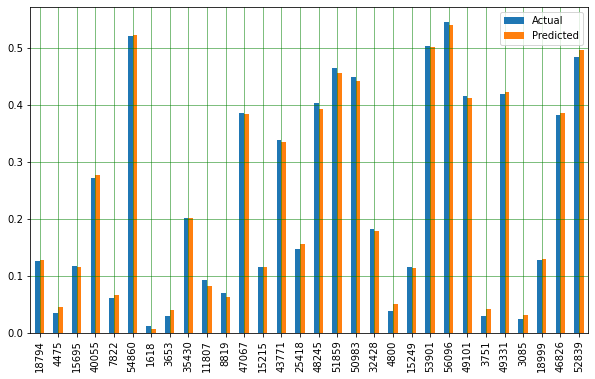

In [16]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

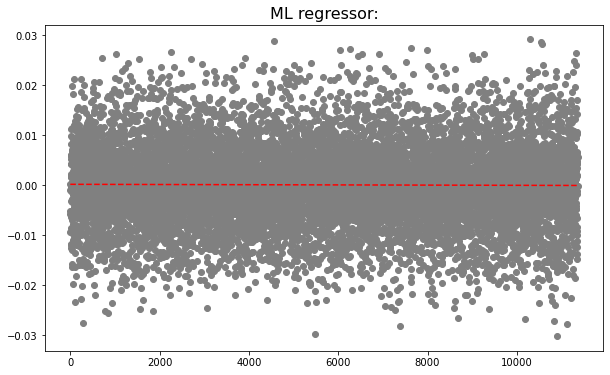

In [17]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

In [18]:
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

r2:  0.9971
MAE:  0.0061
MSE:  0.0001
RMSE:  0.0079


(1.0, 16.0)

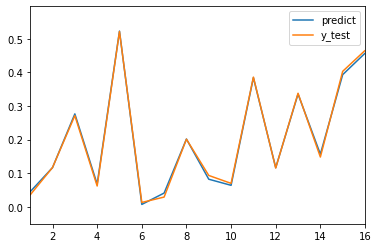

In [19]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [20]:
#Polynomial Regression  (Random State = 3)

In [21]:
#Prepare input X and output y
X = df.iloc[:,0:16]
y = df['measured_wearout']
scaler = StandardScaler()
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
print(poly_features[:10])
#prepare training and testing set
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=3)

[[-3.06812700e-03  2.76560950e+00  9.98534140e-01 ...  5.32685840e+01
   2.64235330e-03  1.31072209e-07]
 [-6.13625390e-03  2.76438240e+00  9.98939160e-01 ...  5.35183926e+01
   2.87299471e-03  1.54229195e-07]
 [ 1.22725080e-03  2.76131420e+00  9.99080300e-01 ...  5.38694008e+01
   9.45787744e-04  1.66052424e-08]
 ...
 [-1.10452570e-02  2.75149630e+00  1.00043640e+00 ...  5.53976714e+01
   4.20181448e-03  3.18700128e-07]
 [-3.68175240e-03  2.74597360e+00  1.00016640e+00 ...  5.55143908e+01
   3.47471914e-03  2.17487266e-07]
 [ 2.39313900e-02  2.74413280e+00  9.99877990e-01 ...  5.57439558e+01
   1.32861814e-03  3.16666830e-08]]


In [22]:
#Creating Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
print("Intercept: %.2f" % poly_reg_model.intercept_)
print("model coefficient:")
print(poly_reg_model.coef_.round(2))
#Model Estimation
poly_reg_y_predicted = poly_reg_model.predict(X_test)
#x2^2 and x1x2 like not impt very small

Intercept: 7.20
model coefficient:
[-2.500000e-01  1.167000e+01 -2.970000e+00 -1.322000e+01 -3.095000e+01
  3.930000e+00 -5.810000e+00 -2.180000e+00 -1.056000e+01  2.340000e+01
  2.050000e+00  2.145000e+01 -2.521000e+01  6.080000e+00  3.000000e-02
  8.110000e+00 -3.000000e-02  4.800000e-01 -4.600000e-01 -5.000000e-01
 -5.482000e+01  3.300000e-01 -2.714000e+01  2.500000e-01  4.100000e-01
  3.492000e+01 -1.030000e+00  5.090000e+00  1.111800e+02  3.900000e-01
  1.000000e-02  1.032000e+01  2.990000e+00 -1.730000e+00 -5.250000e+00
  2.934700e+02  1.800000e-01  3.268000e+01  1.340000e+00 -1.030000e+01
 -2.429800e+02 -6.000000e+00 -1.089000e+02 -4.029800e+02 -4.900000e-01
  4.000000e-02  1.130000e+01 -3.230000e+00  1.590000e+00 -1.522000e+01
 -1.126000e+01 -3.040000e+00  1.118000e+01 -7.970000e+00  8.960000e+00
 -1.608000e+01  8.350000e+00 -1.108070e+03  1.150000e+01 -7.000000e-02
 -1.890000e+00  2.110000e+00 -3.039700e+02 -2.000000e-02 -3.134000e+01
 -1.900000e-01  1.090000e+01  2.483100e+02

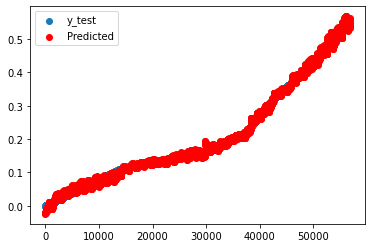

In [23]:
# model estimate
y_pred = poly_reg_model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red')
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<Figure size 3600x288 with 0 Axes>

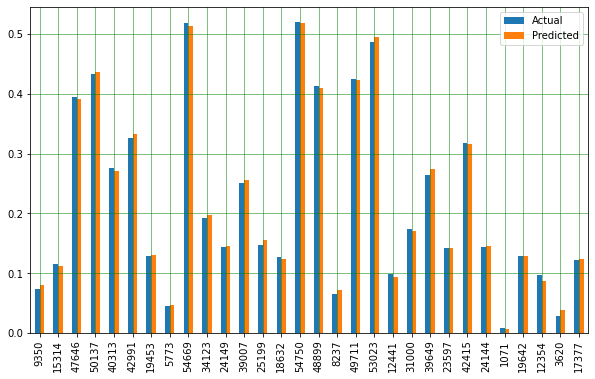

In [24]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

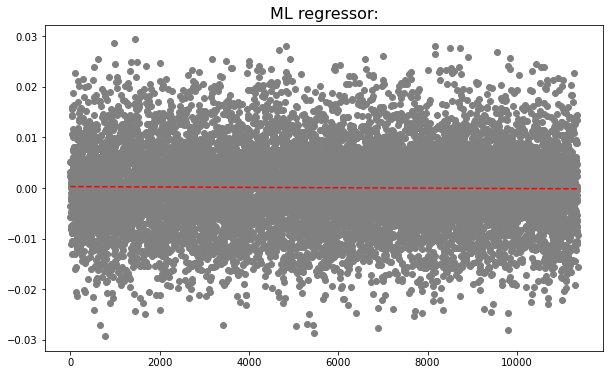

In [25]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

In [26]:
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

r2:  0.9971
MAE:  0.0062
MSE:  0.0001
RMSE:  0.008


(1.0, 16.0)

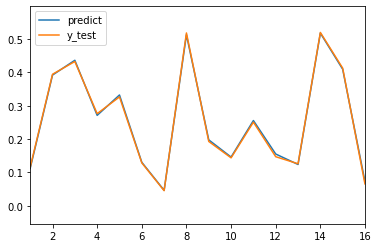

In [27]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [28]:
#Correlation Analysis

In [29]:
#calculate correlation and Validate linear relationship
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,dx,fa,fca,fm,fod,fstd,kpr,kts,ra,re,skew,sod,sre,std,thp,vf,measured_wearout
dx,1.000000,-0.001410,0.000406,-0.001374,0.403036,-0.001963,0.312750,-0.002613,-0.005312,0.379456,-0.000918,0.025763,-0.033154,0.000848,-0.003073,-0.015620,-0.001515
fa,-0.001410,1.000000,0.985432,0.999997,-0.006420,0.899458,-0.001143,-0.728452,-0.334692,0.003985,-0.700828,-0.001660,0.542418,0.991629,-0.025088,-0.019657,0.972322
fca,0.000406,0.985432,1.000000,0.985430,-0.006717,0.862770,-0.001744,-0.810616,-0.344578,0.004343,-0.789706,-0.001442,0.540694,0.994553,-0.125559,-0.017812,0.983428
fm,-0.001374,0.999997,0.985430,1.000000,-0.006373,0.899190,-0.001132,-0.728641,-0.334459,0.004025,-0.701028,-0.001642,0.542495,0.991574,-0.025374,-0.019709,0.972293
fod,0.403036,-0.006420,-0.006717,-0.006373,1.000000,-0.006702,0.358386,0.003032,0.009751,0.945911,0.005337,0.391052,-0.069314,-0.006845,-0.005233,0.124662,-0.010647
fstd,-0.001963,0.899458,0.862770,0.899190,-0.006702,1.000000,-0.002267,-0.424991,-0.404557,0.005989,-0.397772,-0.000447,0.537592,0.899836,0.321813,0.022843,0.888954
kpr,0.312750,-0.001143,-0.001744,-0.001132,0.358386,-0.002267,1.000000,0.000869,0.046348,0.332232,0.002180,0.083760,-0.027067,-0.001176,-0.001116,0.032363,-0.004146
kts,-0.002613,-0.728452,-0.810616,-0.728641,0.003032,-0.424991,0.000869,1.000000,0.179135,-0.004227,0.991955,0.000775,-0.371209,-0.761306,0.638370,0.054412,-0.763321
ra,-0.005312,-0.334692,-0.344578,-0.334459,0.009751,-0.404557,0.046348,0.179135,1.000000,0.000483,0.166667,0.000069,-0.208367,-0.359266,-0.127903,-0.007285,-0.360470
re,0.379456,0.003985,0.004343,0.004025,0.945911,0.005989,0.332232,-0.004227,0.000483,1.000000,-0.002443,0.169703,-0.039301,0.003972,-0.004517,0.046762,0.001206


In [30]:
#Ranking absolute values of correlation compared to condition
display(abs(df.corr()['measured_wearout']).sort_values(ascending = 0))

measured_wearout    1.000000
fca                 0.983428
std                 0.981979
fa                  0.972322
fm                  0.972293
fstd                0.888954
kts                 0.763321
skew                0.745541
sre                 0.586237
ra                  0.360470
thp                 0.090840
vf                  0.022748
fod                 0.010647
kpr                 0.004146
dx                  0.001515
re                  0.001206
sod                 0.000168
Name: measured_wearout, dtype: float64

In [31]:
#Ranking correlation coefficient amoung parameters
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df,200))

Top Absolute Correlations
fa    fm                  0.999997
fca   std                 0.994553
kts   skew                0.991955
fa    std                 0.991629
fm    std                 0.991574
                            ...   
ra    re                  0.000483
fstd  sod                 0.000447
dx    fca                 0.000406
sod   measured_wearout    0.000168
ra    sod                 0.000069
Length: 136, dtype: float64


In [32]:
#Correlation Analysis (Multi-Linear Regression)

In [33]:
#filtering out features with correlation coefficient > 0.9
corr_matrix = df.corr()
corr_matrix['measured_wearout'].sort_values(ascending = False)

features = []
for feature, value in corr_matrix['measured_wearout'].iteritems():
    if abs(value) >= 0.9 and abs(value) < 1:
        features.append(feature)
    else:
        pass
print(features)
X = df[features]
y = df['measured_wearout']
#transform the features to standard scaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
#prepare training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.2, random_state=42)

['fa', 'fca', 'fm', 'std']


In [34]:
#build up multiple linear regrerssion model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
# model coefficients
print("Coefficients: ", np.round(model.coef_, 2))
# model intercept
print("intercept: ", np.round(model.intercept_,2))
#Model Estimation
y_pred = model.predict(X_test)
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Coefficients:  [ 0.12  0.09 -0.12  0.06]
intercept:  0.21
r2:  0.9687
MAE:  0.0181
MSE:  0.0007
RMSE:  0.026


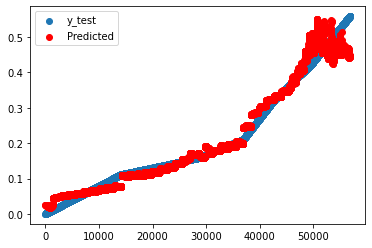

In [35]:
# model estimate
y_pred = model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red');
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<Figure size 3600x288 with 0 Axes>

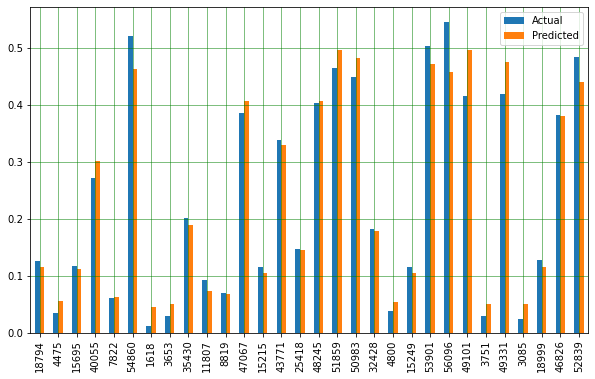

In [36]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

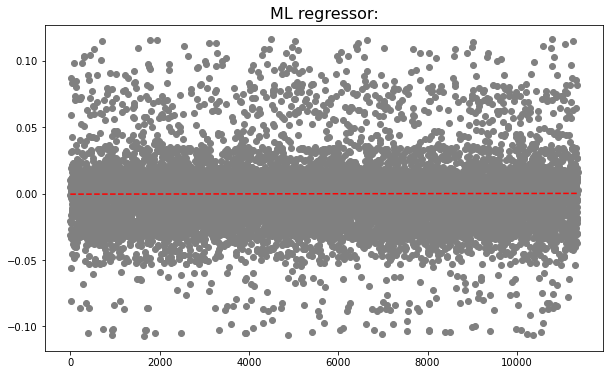

In [37]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

(1.0, 16.0)

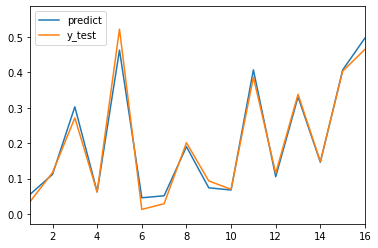

In [38]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [39]:
#Correlation Analysis (Multi-Linear Regression) part 2

In [40]:
#filtering out features with correlation coefficient > 0.8
corr_matrix = df.corr()
corr_matrix['measured_wearout'].sort_values(ascending = False)

features = []
for feature, value in corr_matrix['measured_wearout'].iteritems():
    if abs(value) >= 0.8 and abs(value) < 1:
        features.append(feature)
    else:
        pass
print(features)
X = df[features]
y = df['measured_wearout']
#transform the features to standard scaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
#prepare training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.2, random_state=42)

['fa', 'fca', 'fm', 'fstd', 'std']


In [41]:
#build up multiple linear regrerssion model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
# model coefficients
print("Coefficients: ", np.round(model.coef_, 2))
# model intercept
print("intercept: ", np.round(model.intercept_,2))
#Model Estimation
y_pred = model.predict(X_test)
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Coefficients:  [-0.62  0.21  0.6   0.04 -0.08]
intercept:  0.21
r2:  0.9758
MAE:  0.0167
MSE:  0.0005
RMSE:  0.0229


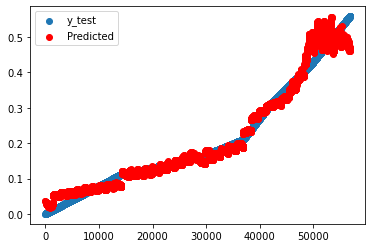

In [42]:
# model estimate
y_pred = model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red');
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<Figure size 3600x288 with 0 Axes>

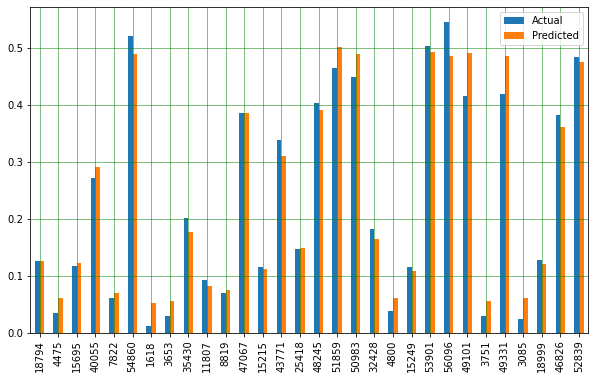

In [43]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

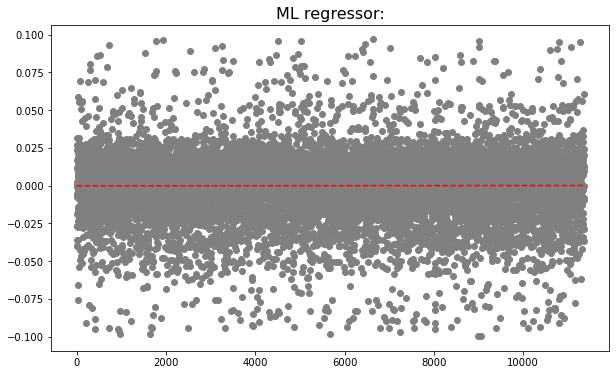

In [44]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

(1.0, 16.0)

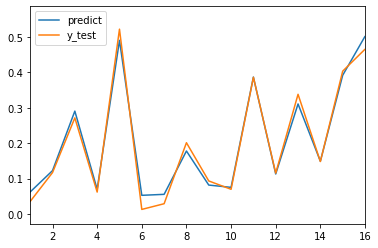

In [45]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [46]:
#Correlation Analysis (Polynomial Regression)

In [47]:
#filtering out features with correlation coefficient > 0.9
corr_matrix = df.corr()
corr_matrix['measured_wearout'].sort_values(ascending = False)

features = []
for feature, value in corr_matrix['measured_wearout'].iteritems():
    if abs(value) >= 0.9 and abs(value) < 1:
        features.append(feature)
    else:
        pass
print(features)
X = df[features]
y = df['measured_wearout']
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)#have 5 coeff, x1,x1^2,x2,x2^2,x1x2
poly_features = poly.fit_transform(X)
#print(poly_features[:10])
#prepare training and testing set
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

['fa', 'fca', 'fm', 'std']


In [48]:
#Creating Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
print("Intercept: %.2f" % poly_reg_model.intercept_)
print("model coefficient:")
print(poly_reg_model.coef_.round(2))
#Model Estimation
y_pred = poly_reg_model.predict(X_test)
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Intercept: -0.37
model coefficient:
[ -5.19  -0.9    5.37   0.89 -33.36   5.26  68.72  -9.08   0.78  -4.96
  -1.89 -35.45   9.14   0.69]
r2:  0.9799
MAE:  0.0141
MSE:  0.0004
RMSE:  0.0209


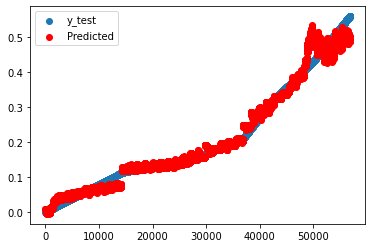

In [49]:
# model estimate
y_pred = poly_reg_model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red');
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<Figure size 3600x288 with 0 Axes>

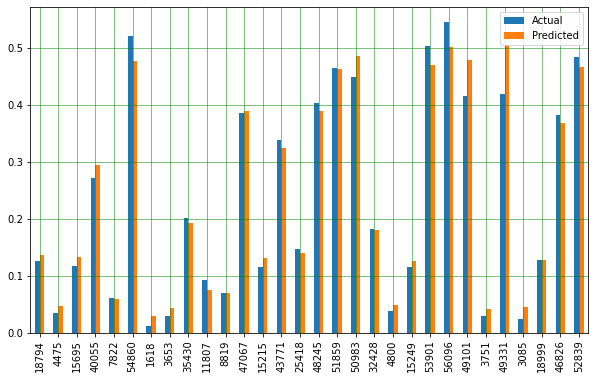

In [50]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

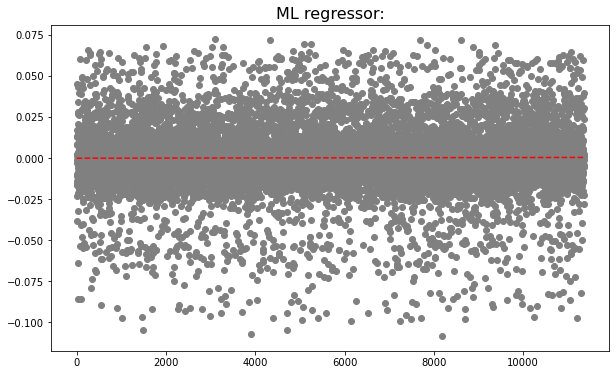

In [51]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

(1.0, 16.0)

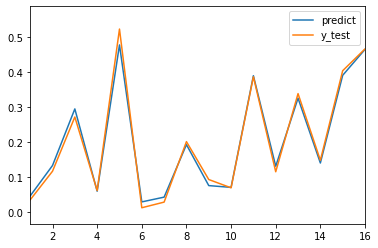

In [52]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [53]:
#Correlation Analysis (Polynomial Regression) Part 2

In [54]:
#filtering out features with correlation coefficient > 0.8
corr_matrix = df.corr()
corr_matrix['measured_wearout'].sort_values(ascending = False)

features = []
for feature, value in corr_matrix['measured_wearout'].iteritems():
    if abs(value) >= 0.8 and abs(value) < 1:
        features.append(feature)
    else:
        pass
print(features)
X = df[features]
y = df['measured_wearout']
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)#have 5 coeff, x1,x1^2,x2,x2^2,x1x2
poly_features = poly.fit_transform(X)
#print(poly_features[:10])
#prepare training and testing set
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

['fa', 'fca', 'fm', 'fstd', 'std']


In [55]:
#Creating Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
print("Intercept: %.2f" % poly_reg_model.intercept_)
print("model coefficient:")
print(poly_reg_model.coef_.round(2))
#Model Estimation
y_pred = poly_reg_model.predict(X_test)
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Intercept: -0.34
model coefficient:
[ -4.09  -1.17   4.24  -1.     1.58 -22.94   8.01  46.05  12.83 -11.1
   3.98  -7.65   6.9  -11.06 -23.19 -12.59  11.01   2.4   -8.95   7.09]
r2:  0.9891
MAE:  0.0112
MSE:  0.0002
RMSE:  0.0153


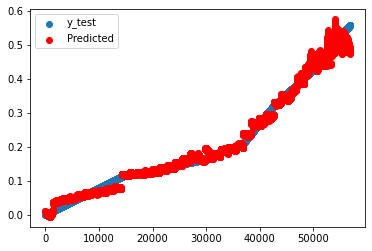

In [56]:
# model estimate
y_pred = poly_reg_model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red');
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<Figure size 3600x288 with 0 Axes>

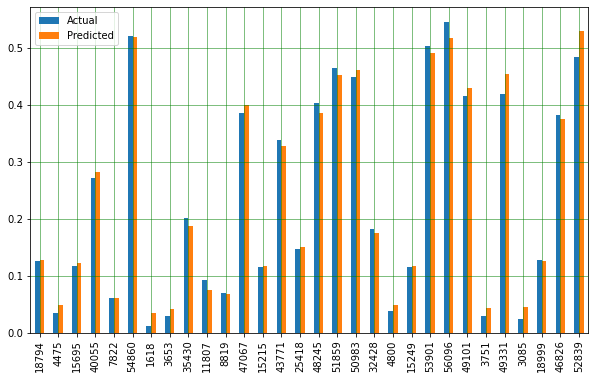

In [57]:
#Compare Predict with Real
df_temp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp1.head()
df_temp1 = df_temp1.head(30)
plt.figure(figsize=(50,4))
df_temp1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

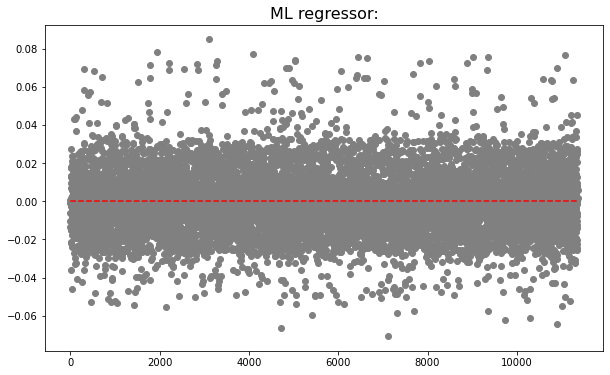

In [58]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

(1.0, 16.0)

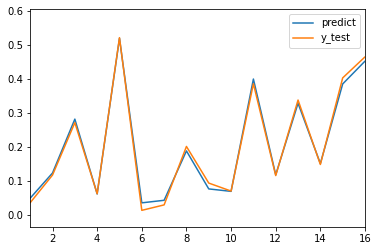

In [59]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

In [60]:
#Principal Components Analysis (Multi-Linear Regression)

In [61]:
#define predictor and response variables
X = df.iloc[:,0:16]
Y = df[['measured_wearout']]
X = StandardScaler().fit_transform(X)
#scale predictor variables
n_components = 16
pca = PCA(n_components)
principalComponents = pca.fit_transform(X)
basename = "PC"
for i in range(1,17):
    principalDataframe = pd.DataFrame(data = principalComponents, columns = ["{}{}".format(basename, i) for i in range(1, 17)])
print(principalDataframe)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -3.114277 -0.602814 -1.035911 -0.970286 -0.103637  0.258235  0.120036   
1     -3.106259  0.132786 -1.052389 -0.784222 -0.143946  0.003612  1.030926   
2     -3.084177  0.346604 -1.076900 -0.289448 -0.308008 -0.277040  1.136528   
3     -3.035952 -0.793097 -0.913267 -1.132175 -0.118674 -0.027743 -0.040071   
4     -2.982759  0.406275 -0.928608 -0.390164 -0.270409 -0.605054  1.058439   
...         ...       ...       ...       ...       ...       ...       ...   
56795  4.102481 -1.676992 -0.599137  0.140329  0.161894 -0.810016 -0.800409   
56796  4.213504 -0.414053 -0.723485  2.088874  0.908436 -0.486593 -1.258862   
56797  4.292523 -1.706611 -0.654090  0.824065 -0.665779  0.128469 -1.539501   
56798  4.145216 -3.766826 -0.653358  1.103784  0.308780 -0.352220 -0.902130   
56799  4.243215 -1.982245 -0.761991  4.304332  3.287401 -0.956017 -1.060450   

            PC8       PC9      PC10      PC11      

pca.explained_variance_ratio % [4.037e+01 1.589e+01 1.214e+01 7.220e+00 5.480e+00 5.150e+00 4.610e+00
 4.080e+00 4.000e+00 6.100e-01 2.400e-01 1.500e-01 4.000e-02 2.000e-02
 0.000e+00 0.000e+00]
pca.explained_variance_cumsum % [ 40.37  56.26  68.4   75.62  81.1   86.25  90.86  94.94  98.94  99.55
  99.79  99.94  99.98 100.   100.   100.  ]


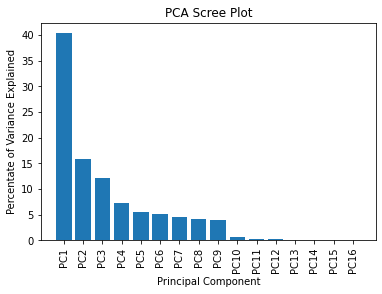

In [62]:
#Perform a Scree Plot of the Principal Components
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print("pca.explained_variance_ratio %", percent_variance)
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print("pca.explained_variance_cumsum %", cumsum)
columns = ["{}{}".format(basename, i) for i in range(1, 17)]
plt.bar(x= range(1,17), height=percent_variance, tick_label=columns)
plt.xticks(rotation=90)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [63]:
#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#scale the training and testing data

X_pca_train = pca.fit_transform(scale(X_train))
X_pca_test = pca.transform(scale(X_test))

#print(poly_features[:10])
print("X_pca_train")
print(X_pca_train[0:16])
print("X_pca_test")
print(X_pca_test[0:16])

X_pca_train
[[-2.38988579e+00 -1.33003305e+00 -2.44546943e-01  3.70220166e-01
   1.33870535e+00 -1.19820031e+00  4.33725015e-02  8.71418705e-01
   2.05767176e-01  5.03215450e-02  5.41922058e-02  1.30277630e-01
  -4.55275125e-02  3.62892768e-02  5.31070435e-03  1.09198762e-03]
 [-2.31506685e+00 -5.97582378e-01 -5.11232868e-01 -1.44548861e+00
   5.56770257e-01 -8.82833143e-01 -7.45047556e-01  2.04456542e+00
  -8.34367263e-01  1.48871932e-01  1.72158978e-01  2.22358003e-02
  -2.57692845e-02 -4.08720331e-03 -7.21420812e-03  3.97568394e-04]
 [-2.03425585e+00 -1.47281817e+00  2.48237693e+00  6.15178129e-01
   4.61147531e-01 -1.23806109e+00  2.97886082e-01 -1.49649178e-02
  -3.93016675e-02 -2.90556736e-01 -1.08343382e-01  1.69595544e-01
  -8.86387051e-03  1.41109291e-02 -2.90992312e-03 -4.16013031e-04]
 [-1.92501183e+00 -8.74957850e-01  1.81209357e+00  4.11130831e-02
   2.18003943e+00  1.95190303e+00  6.02832323e-01  1.34916168e+00
  -3.95699392e-01 -2.28502889e-01 -1.16417419e-01  5.95424361

principle component = 1
mse_score 0.02866883
Coefficient of determination: 0.96207642
principle component = 2
mse_score 0.02864792
Coefficient of determination: 0.96213171
principle component = 3
mse_score 0.0255829
Coefficient of determination: 0.96980125
principle component = 4
mse_score 0.02557677
Coefficient of determination: 0.96981572
principle component = 5
mse_score 0.02551016
Coefficient of determination: 0.96997272
principle component = 6
mse_score 0.0248697
Coefficient of determination: 0.97146154
principle component = 7
mse_score 0.02476248
Coefficient of determination: 0.97170709
principle component = 8
mse_score 0.02473686
Coefficient of determination: 0.97176559
principle component = 9
mse_score 0.02420988
Coefficient of determination: 0.97295575
principle component = 10
mse_score 0.02352595
Coefficient of determination: 0.97446218
principle component = 11
mse_score 0.02133626
Coefficient of determination: 0.97899484
principle component = 12
mse_score 0.02124798
Coeffici

Text(0.5, 1.0, 'measured_wearout')

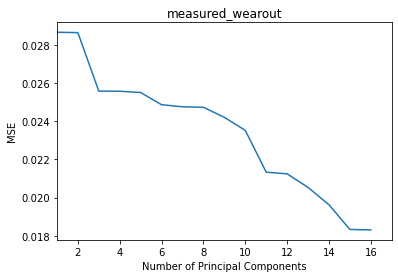

In [64]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 17):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,17])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

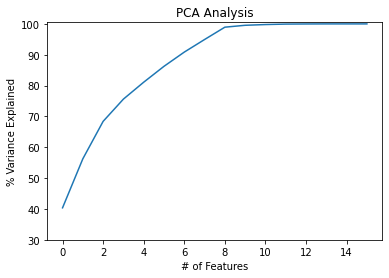

In [65]:
#Ploting of cumulative sum of varicance 
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cumsum)

(1.0, 16.0)

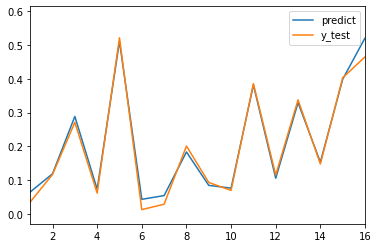

In [66]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

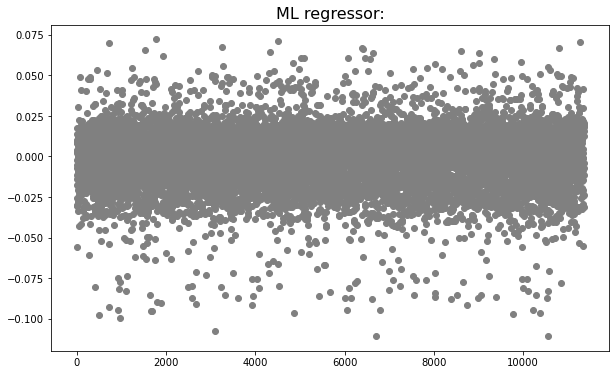

In [67]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

In [68]:
#Principal Components Analysis (Multi-Linear Regression) after reduction to 6PCs

In [69]:
#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#scale the training and testing data

X_pca_train = pca.fit_transform(scale(X_train))
X_pca_test = pca.transform(scale(X_test))

#print(poly_features[:10])
print("X_pca_train")
print(X_pca_train[0:6])
print("X_pca_test")
print(X_pca_test[0:6])

X_pca_train
[[-2.38988579e+00 -1.33003305e+00 -2.44546943e-01  3.70220166e-01
   1.33870535e+00 -1.19820031e+00  4.33725015e-02  8.71418705e-01
   2.05767176e-01  5.03215450e-02  5.41922058e-02  1.30277630e-01
  -4.55275125e-02  3.62892768e-02  5.31070435e-03  1.09198762e-03]
 [-2.31506685e+00 -5.97582378e-01 -5.11232868e-01 -1.44548861e+00
   5.56770257e-01 -8.82833143e-01 -7.45047556e-01  2.04456542e+00
  -8.34367263e-01  1.48871932e-01  1.72158978e-01  2.22358003e-02
  -2.57692845e-02 -4.08720331e-03 -7.21420812e-03  3.97568394e-04]
 [-2.03425585e+00 -1.47281817e+00  2.48237693e+00  6.15178129e-01
   4.61147531e-01 -1.23806109e+00  2.97886082e-01 -1.49649178e-02
  -3.93016675e-02 -2.90556736e-01 -1.08343382e-01  1.69595544e-01
  -8.86387051e-03  1.41109291e-02 -2.90992312e-03 -4.16013031e-04]
 [-1.92501183e+00 -8.74957850e-01  1.81209357e+00  4.11130831e-02
   2.18003943e+00  1.95190303e+00  6.02832323e-01  1.34916168e+00
  -3.95699392e-01 -2.28502889e-01 -1.16417419e-01  5.95424361

In [70]:
#polynomial features to terms after splitting, exact same results
#poly = PolynomialFeatures(degree=4, include_bias=False)
#Xtrainpoly = poly.fit_transform(X_pca_train)
#Xtestpoly = poly.fit_transform(X_pca_test)

principle component = 1
mse_score 0.02866883
Coefficient of determination: 0.96207642
principle component = 2
mse_score 0.02864792
Coefficient of determination: 0.96213171
principle component = 3
mse_score 0.0255829
Coefficient of determination: 0.96980125
principle component = 4
mse_score 0.02557677
Coefficient of determination: 0.96981572
principle component = 5
mse_score 0.02551016
Coefficient of determination: 0.96997272
principle component = 6
mse_score 0.0248697
Coefficient of determination: 0.97146154


Text(0.5, 1.0, 'measured_wearout')

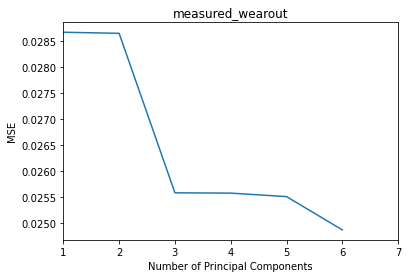

In [71]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 7):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,7])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

(1.0, 16.0)

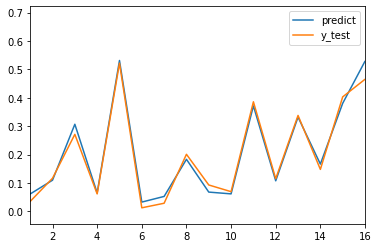

In [72]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,16])

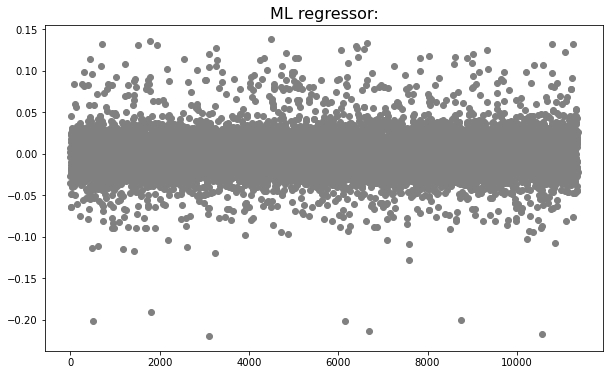

In [73]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

principle component = 1
mse_score 0.02866883
Coefficient of determination: 0.96207642
principle component = 2
mse_score 0.02864792
Coefficient of determination: 0.96213171
principle component = 3
mse_score 0.0255829
Coefficient of determination: 0.96980125
principle component = 4
mse_score 0.02557677
Coefficient of determination: 0.96981572
principle component = 5
mse_score 0.02551016
Coefficient of determination: 0.96997272
principle component = 6
mse_score 0.0248697
Coefficient of determination: 0.97146154
principle component = 7
mse_score 0.02476248
Coefficient of determination: 0.97170709
principle component = 8
mse_score 0.02473686
Coefficient of determination: 0.97176559
principle component = 9
mse_score 0.02420988
Coefficient of determination: 0.97295575
principle component = 10
mse_score 0.02352595
Coefficient of determination: 0.97446218
principle component = 11
mse_score 0.02133626
Coefficient of determination: 0.97899484
principle component = 12
mse_score 0.02124798
Coeffici

Text(0.5, 1.0, 'measured_wearout')

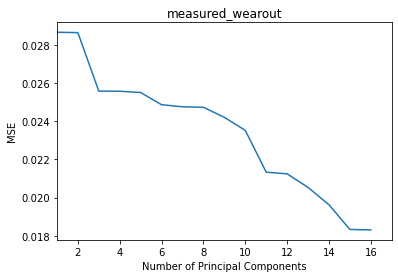

In [74]:
#polynomial features to terms after splitting, exact same results
poly = PolynomialFeatures(degree=2, include_bias=False)
Xtrainpoly = poly.fit_transform(X_pca_train)
Xtestpoly = poly.fit_transform(X_pca_test)
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 17):
    regr = LinearRegression()
    regr.fit(Xtrainpoly[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(Xtestpoly[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,17])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

In [75]:
#Principal Components Analysis (Multi-Linear Regression) after reduction to 2PCs

In [76]:
#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#scale the training and testing data

X_pca_train = pca.fit_transform(scale(X_train))
X_pca_test = pca.transform(scale(X_test))

#print(poly_features[:10])
print("X_pca_train")
print(X_pca_train[0:2])
print("X_pca_test")
print(X_pca_test[0:2])

X_pca_train
[[-2.38988579e+00 -1.33003305e+00 -2.44546943e-01  3.70220166e-01
   1.33870535e+00 -1.19820031e+00  4.33725015e-02  8.71418705e-01
   2.05767176e-01  5.03215450e-02  5.41922058e-02  1.30277630e-01
  -4.55275125e-02  3.62892768e-02  5.31070435e-03  1.09198762e-03]
 [-2.31506685e+00 -5.97582378e-01 -5.11232868e-01 -1.44548861e+00
   5.56770257e-01 -8.82833143e-01 -7.45047556e-01  2.04456542e+00
  -8.34367263e-01  1.48871932e-01  1.72158978e-01  2.22358003e-02
  -2.57692845e-02 -4.08720331e-03 -7.21420812e-03  3.97568394e-04]]
X_pca_test
[[-1.82835536e+00 -1.24660038e+00  2.44548285e+00  1.92040325e+00
  -6.55608609e-01 -4.40388766e-01  9.61862756e-01 -5.71717959e-01
   5.45225737e-01 -8.78496419e-02 -1.83333183e-03  1.50188482e-01
   5.71088447e-02 -4.60576234e-02 -1.75288713e-02  9.97810392e-04]
 [-2.43284747e+00  1.07896918e-02 -6.31017301e-01 -9.75805546e-01
  -1.43789696e+00 -4.21948539e-01  3.96962712e-01  1.10728675e-01
   4.75119447e-01  2.22146005e-01  2.41808272e-01

principle component = 1
mse_score 0.02866883
Coefficient of determination: 0.96207642
principle component = 2
mse_score 0.02864792
Coefficient of determination: 0.96213171


Text(0.5, 1.0, 'measured_wearout')

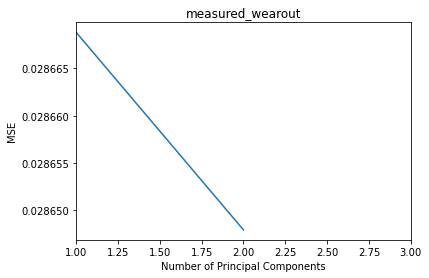

In [77]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 3):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,3])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

(1.0, 17.0)

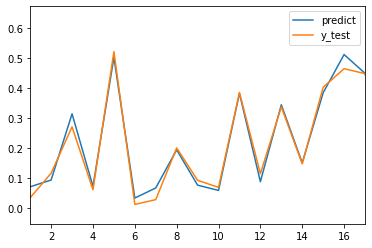

In [78]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,17])

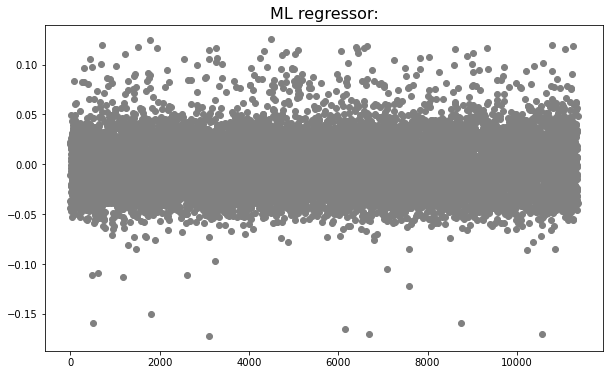

In [79]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

In [80]:
#Principal Components Analysis (Polynomial Regression)

In [81]:
#define predictor and response variables
X = df.iloc[:,0:16]
Y = df[['measured_wearout']]
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
#print(poly_features[:10])
#scale predictor variables
n_components = 16
pca = PCA(n_components)
principalComponents = pca.fit_transform(poly_features)
basename = "PC"
for i in range(1,17):
    principalDataframe = pd.DataFrame(data = principalComponents, columns = ["{}{}".format(basename, i) for i in range(1, 17)])
print(principalDataframe)

              PC1        PC2        PC3       PC4       PC5       PC6  \
0      -80.435536 -31.253264 -10.627446  2.235187 -1.449617 -0.186002   
1      -80.177999 -31.282192 -10.620853  2.239145 -1.474263 -0.195755   
2      -79.822601 -31.337140 -10.608417  2.267393 -1.500874 -0.210573   
3      -79.492962 -31.342861 -10.600421  2.265378 -1.511858 -0.216442   
4      -79.142154 -31.394792 -10.589130  2.271223 -1.540430 -0.223888   
...           ...        ...        ...       ...       ...       ...   
56795 -132.894656  25.390316  31.883766 -1.466960 -2.252325 -0.296547   
56796 -132.847605  25.611919  31.982686 -1.526171 -2.231030 -0.314966   
56797 -132.922884  25.666031  32.146715 -1.542628 -2.219863 -0.327654   
56798 -132.785989  25.919840  32.125940 -1.606775 -2.202117 -0.343915   
56799 -132.500919  26.420619  32.063923 -1.729315 -2.159349 -0.386175   

            PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0     -0.346226  0.500837  0.103056  0.17384

pca.explained_variance_ratio % [9.397e+01 5.460e+00 4.900e-01 7.000e-02 1.000e-02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]
pca.explained_variance_cumsum % [ 93.97  99.43  99.92  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.  ]


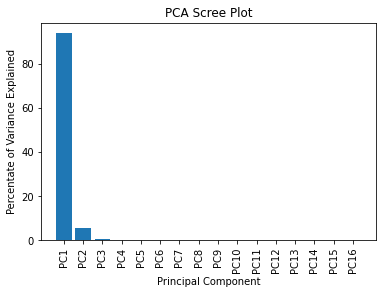

In [82]:
#Perform a Scree Plot of the Principal Components
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print("pca.explained_variance_ratio %", percent_variance)
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print("pca.explained_variance_cumsum %", cumsum)
columns = ["{}{}".format(basename, i) for i in range(1, 17)]
plt.bar(x= range(1,17), height=percent_variance, tick_label=columns)
plt.xticks(rotation=90)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [83]:
#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(poly_features,Y,test_size=0.2,random_state=42)
#scale the training and testing data

X_pca_train = pca.fit_transform(scale(X_train))
X_pca_test = pca.transform(scale(X_test))

#poly = PolynomialFeatures(degree=4, include_bias=False)#have 5 coeff, x1,x1^2,x2,x2^2,x1x2
#Xtrainpoly = poly.fit_transform(X_pca_train)
#Xtestpoly = poly.fit_transform(X_pca_test)
#print(poly_features[:10])
print("X_pca_train")
print(X_pca_train[0:16])
print("X_pca_test")
print(X_pca_test[0:16])

X_pca_train
[[-6.07024388e+00 -2.65095650e+00 -5.23295113e-01  1.80988119e+00
   4.03679360e+00  1.76692410e+00  9.19146641e-01 -2.38674293e+00
   9.18972661e-02 -2.77679815e-01 -1.79984486e+00 -8.68112791e-01
  -2.12585520e-01 -8.20155756e-01 -5.69102572e-01  1.03200671e+00]
 [-5.98046937e+00 -1.08674861e+00 -1.16641919e+00 -2.98726542e+00
   1.23111031e+00  2.57523897e+00 -1.28181911e+00 -5.96792941e+00
   7.21169201e-01  1.17227341e+00  2.72798511e-01 -8.72286527e-01
   2.61584674e-01  4.86125526e-01 -6.84224039e-01  3.04833358e-01]
 [-2.93386228e+00 -4.21143842e+00  7.90018278e+00  2.62556161e+00
   2.68708536e+00 -7.80460248e-01  1.23681187e+00 -8.10122799e-01
   1.00788886e+00 -9.22531804e-01 -1.76168027e+00 -2.88674915e-01
  -1.93046363e+00 -5.92850755e-02 -1.40707100e+00  1.63745714e+00]
 [-1.23548996e+00 -3.00812509e+00  8.60125549e+00  9.19639663e-01
   4.40186373e+00  2.27758244e+00 -1.44356033e+00 -3.28194055e+00
  -1.38675976e+00  1.20241303e-02 -7.02099456e-01  3.54299996

principle component = 1
mse_score 0.04720891
Coefficient of determination: 0.89716584
principle component = 2
mse_score 0.04488798
Coefficient of determination: 0.90702853
principle component = 3
mse_score 0.03435426
Coefficient of determination: 0.94554339
principle component = 4
mse_score 0.03436534
Coefficient of determination: 0.94550823
principle component = 5
mse_score 0.03434449
Coefficient of determination: 0.94557434
principle component = 6
mse_score 0.029497
Coefficient of determination: 0.95985372
principle component = 7
mse_score 0.02677955
Coefficient of determination: 0.96691005
principle component = 8
mse_score 0.02677915
Coefficient of determination: 0.96691104
principle component = 9
mse_score 0.0267244
Coefficient of determination: 0.96704621
principle component = 10
mse_score 0.02662694
Coefficient of determination: 0.96728612
principle component = 11
mse_score 0.0266275
Coefficient of determination: 0.96728475
principle component = 12
mse_score 0.02633263
Coefficien

Text(0.5, 1.0, 'measured_wearout')

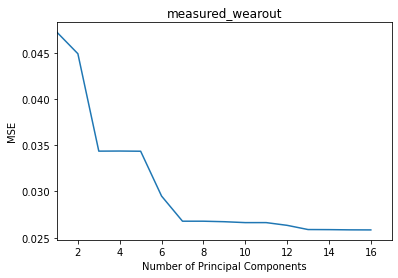

In [84]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 17):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,17])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

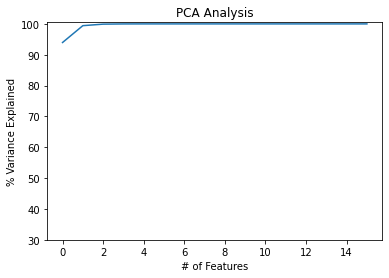

In [85]:
#Ploting of cumulative sum of varicance 
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cumsum)

(1.0, 17.0)

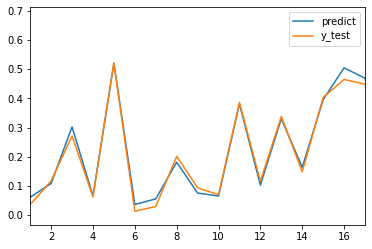

In [86]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
plt.xlim([1,17])

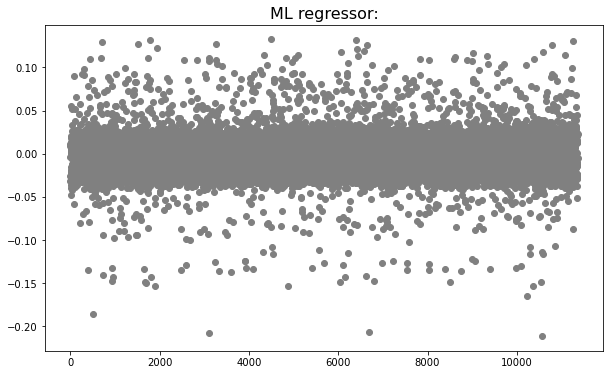

In [87]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

In [88]:
#Part 3

In [89]:
#Reading excel file
train = pd.read_excel("D:\SIT\Y3T1\Data Analytics\Project 2\experiment3.xlsx")
test = pd.read_excel("D:\SIT\Y3T1\Data Analytics\Project 2\experiment3_1.xlsx")
#checking for null values in dataset 
test.isnull().sum()

dx                  0
fa                  0
fca                 0
fm                  0
fod                 0
fstd                0
kpr                 0
kts                 0
ra                  0
re                  0
skew                0
sod                 0
sre                 0
std                 0
thp                 0
vf                  0
measured_wearout    0
dtype: int64

In [90]:
#Building up model with polynomial regresson

In [91]:
#Prepare input X and output y
X1_train = train.iloc[:,0:16].values
y1_train = train['measured_wearout']
X2_test = test.iloc[:,0:16].values
y2_test = test['measured_wearout']
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X1_train = poly.fit_transform(X1_train)
X2_test = poly.fit_transform(X2_test)

In [92]:
#Creating Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X1_train, y1_train)
print("Intercept: %.2f" % poly_reg_model.intercept_)
print("model coefficient:")
print(poly_reg_model.coef_.round(2))
#Model Estimation
y_pred = poly_reg_model.predict(X2_test)

Intercept: 7.32
model coefficient:
[-1.240000e+00  1.188000e+01 -2.650000e+00 -1.349000e+01 -2.691000e+01
  3.930000e+00 -1.242000e+01 -2.060000e+00 -1.108000e+01  2.011000e+01
  2.130000e+00  1.118000e+01 -2.474300e+02  5.960000e+00  3.000000e-02
  1.285000e+01  1.900000e-01  6.000000e-01 -4.800000e-01 -6.300000e-01
 -5.688000e+01  2.800000e-01 -2.647000e+01  3.800000e-01  1.240000e+00
  3.849000e+01 -1.220000e+00  8.600000e+00  8.854000e+01  4.600000e-01
  1.000000e-02  1.036000e+01  5.480000e+00 -1.580000e+00 -1.022000e+01
  3.053500e+02 -0.000000e+00  3.314000e+01  1.400000e+00 -1.058000e+01
 -2.422200e+02 -6.030000e+00 -9.816000e+01 -3.578900e+02 -5.700000e-01
  4.000000e-02  1.298000e+01 -3.100000e+00  1.430000e+00 -7.190000e+00
 -1.104000e+01 -4.880000e+00  1.098000e+01 -8.150000e+00  3.440000e+00
 -1.569000e+01  5.260000e+00 -1.148660e+03  1.119000e+01 -7.000000e-02
 -3.350000e+00  4.610000e+00 -3.162700e+02  1.600000e-01 -3.201000e+01
 -2.400000e-01  1.122000e+01  2.480100e+02

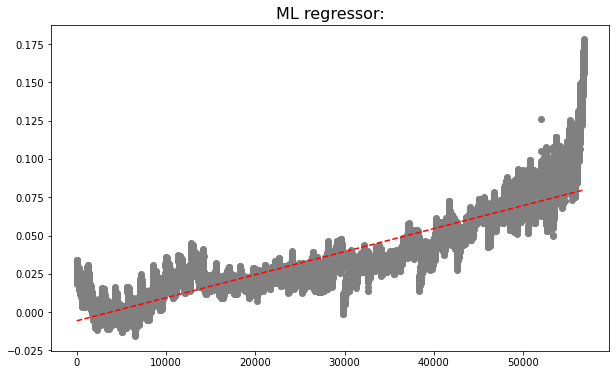

In [93]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y2_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y2_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

In [94]:
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y2_test, y_pred)
mse=metrics.mean_squared_error(y2_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y2_test, y_pred)
r2=metrics.r2_score(y2_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

r2:  0.9283
MAE:  0.0374
MSE:  0.0022
RMSE:  0.0464


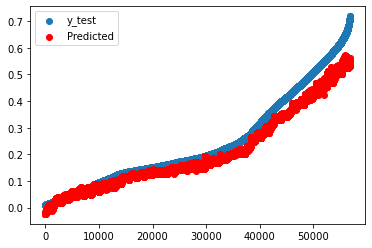

In [95]:
# model estimate
y_pred = poly_reg_model.predict(X2_test)
plt.scatter(y2_test.index, y2_test)
plt.scatter(y2_test.index, y_pred, color='red');
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

<AxesSubplot:>

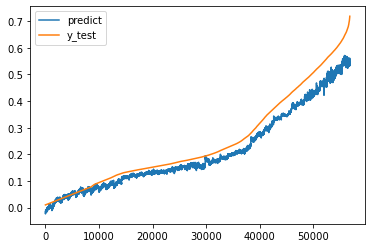

In [96]:
#line plot comparing y_test and y_pred
y_test1 = y2_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
#plt.xlim([1,17])

In [97]:
#Correlation Analysis (Polynomial Regression)

In [98]:
#filtering out features with correlation coefficient > 0.9
corr_matrix = train.corr()
corr_matrix['measured_wearout'].sort_values(ascending = False)

features = []
for feature, value in corr_matrix['measured_wearout'].iteritems():
    if abs(value) >= 0.9 and abs(value) < 1:
        features.append(feature)
    else:
        pass
print(features)
#Prepare new input X and output y
X_train = train[features]
y_train = train['measured_wearout']
X_test = test[features]
y_test = test['measured_wearout']
#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)#have 5 coeff, x1,x1^2,x2,x2^2,x1x2
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
#print(poly_features[:10])

['fa', 'fca', 'fm', 'std']


In [99]:
#Creating Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
print("Intercept: %.2f" % poly_reg_model.intercept_)
print("model coefficient:")
print(poly_reg_model.coef_.round(2))
#Model Estimation
y_pred = poly_reg_model.predict(X_test)
# Evaluation of accuracy
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Intercept: -0.37
model coefficient:
[ -5.17  -0.91   5.36   0.9  -37.04   5.21  75.99  -8.79   0.77  -4.9
  -1.9  -39.03   8.83   0.72]
r2:  0.9104
MAE:  0.0381
MSE:  0.0027
RMSE:  0.0519


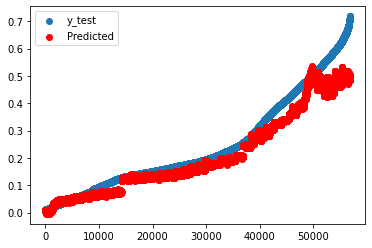

In [100]:
# model estimate
y_pred = poly_reg_model.predict(X_test)
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred, color='red');
plt.legend(["y_test","Predicted"],ncol=1, loc="upper left")

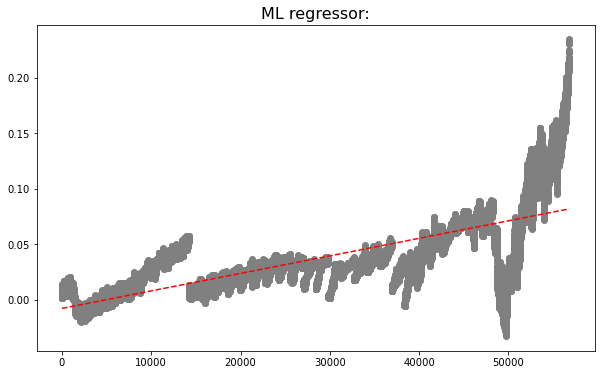

In [101]:
#Erro Analysis
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
#Adding trend line
z = np.polyfit(index_list, y_test-y_pred, 1)
p = np.poly1d(z)
plt.plot(index_list,p(index_list),"r--")

plt.show()

<AxesSubplot:>

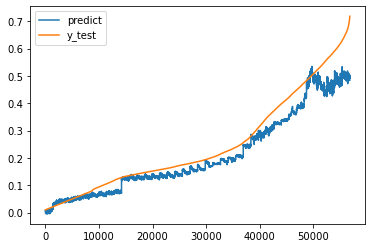

In [102]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = y_pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)
#plt.xlim([1,16])

In [103]:
#Principal Component Analysis (Multi-linear Regression)

In [104]:
#pca
#X = df[:, df.columns != 'measured_wearout']
X1_train = train.iloc[:,0:16].values
y1_train = train['measured_wearout']
X2_test = test.iloc[:,0:16].values
y2_test = test['measured_wearout']
#transform the features to standard scaler
X1_train = StandardScaler().fit_transform(X1_train)
X2_test = StandardScaler().fit_transform(X2_test)
#scale predictor variables
n_components = 16
pca = PCA(n_components)
principalComponents1 = pca.fit_transform(X1_train)
#principalComponents2 = pca.fit_transform(X2_test)
basename = "PC"
for i in range(1,17):
    principalDataframe1 = pd.DataFrame(data = principalComponents1, columns = ["{}{}".format(basename, i) for i in range(1, 17)])
#for i in range(1,17):
#    principalDataframe2 = pd.DataFrame(data = principalComponents2, columns = ["{}{}".format(basename, i) for i in range(1, 17)])
print(principalDataframe1)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -3.114277 -0.602814 -1.035911 -0.970286 -0.103637  0.258235  0.120036   
1     -3.106259  0.132786 -1.052389 -0.784222 -0.143946  0.003612  1.030926   
2     -3.084177  0.346604 -1.076900 -0.289448 -0.308008 -0.277040  1.136528   
3     -3.035952 -0.793097 -0.913267 -1.132175 -0.118674 -0.027743 -0.040071   
4     -2.982759  0.406275 -0.928608 -0.390164 -0.270409 -0.605054  1.058439   
...         ...       ...       ...       ...       ...       ...       ...   
56795  4.102481 -1.676992 -0.599137  0.140329  0.161894 -0.810016 -0.800409   
56796  4.213504 -0.414053 -0.723485  2.088874  0.908436 -0.486593 -1.258862   
56797  4.292523 -1.706611 -0.654090  0.824065 -0.665779  0.128469 -1.539501   
56798  4.145216 -3.766826 -0.653358  1.103784  0.308780 -0.352220 -0.902130   
56799  4.243215 -1.982245 -0.761991  4.304332  3.287401 -0.956017 -1.060450   

            PC8       PC9      PC10      PC11      

pca.explained_variance_ratio % [4.037e+01 1.589e+01 1.214e+01 7.220e+00 5.480e+00 5.150e+00 4.610e+00
 4.080e+00 4.000e+00 6.100e-01 2.400e-01 1.500e-01 4.000e-02 2.000e-02
 0.000e+00 0.000e+00]
pca.explained_variance_cumsum % [ 40.37  56.26  68.4   75.62  81.1   86.25  90.86  94.94  98.94  99.55
  99.79  99.94  99.98 100.   100.   100.  ]


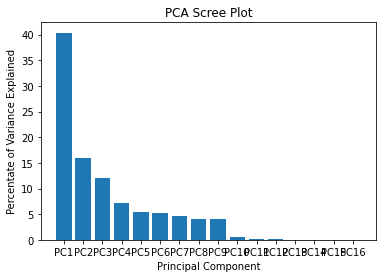

In [105]:
#Perform a Scree Plot of the Principal Components
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print("pca.explained_variance_ratio %", percent_variance)
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print("pca.explained_variance_cumsum %", cumsum)
columns = ["{}{}".format(basename, i) for i in range(1, 17)]
plt.bar(x= range(1,17), height=percent_variance, tick_label=columns)

plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

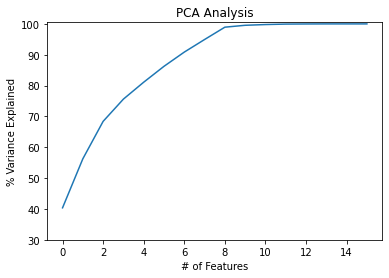

In [106]:
#Ploting of cumulative sum of varicance 
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cumsum)

In [107]:
X_pca_train = pca.fit_transform(scale(X1_train))
X_pca_test = pca.transform(scale(X2_test))
print("X_pca_train")
print(X_pca_train[0:16])
print("X_pca_test")
print(X_pca_test[0:16])
print(X_pca_train.shape)

X_pca_train
[[-3.11427654e+00 -6.02813954e-01 -1.03591080e+00 -9.70286473e-01
  -1.03637373e-01  2.58235351e-01  1.20036029e-01  9.79644473e-03
   5.40021370e-01  3.10489388e-01  2.57668777e-01 -3.60442264e-02
  -1.94785610e-02  4.74703657e-02  1.47991606e-02  2.01504776e-03]
 [-3.10625861e+00  1.32785609e-01 -1.05238863e+00 -7.84222155e-01
  -1.43945854e-01  3.61207395e-03  1.03092593e+00 -1.25016156e-01
   6.35906394e-01  3.06458808e-01  2.73799505e-01 -1.49359696e-01
  -2.45756641e-02  4.05788913e-02  1.28500941e-02  1.69690709e-03]
 [-3.08417700e+00  3.46603712e-01 -1.07690022e+00 -2.89448023e-01
  -3.08007945e-01 -2.77039865e-01  1.13652822e+00  7.15668857e-01
   2.90076697e-01  3.21999014e-01  2.69779664e-01 -1.13572092e-01
  -2.29840621e-02  4.10811996e-02  1.50781688e-02  1.72378286e-03]
 [-3.03595232e+00 -7.93096798e-01 -9.13266502e-01 -1.13217550e+00
  -1.18673664e-01 -2.77433263e-02 -4.00714408e-02 -3.68072294e-01
   7.90508286e-01  3.26135921e-01  2.59298194e-01 -3.16473493

principle component = 1
mse_score 0.05657857
Coefficient of determination: 0.89339476
principle component = 2
mse_score 0.05656699
Coefficient of determination: 0.89343839
principle component = 3
mse_score 0.05471323
Coefficient of determination: 0.90030821
principle component = 4
mse_score 0.05471008
Coefficient of determination: 0.90031969
principle component = 5
mse_score 0.05466796
Coefficient of determination: 0.90047310
principle component = 6
mse_score 0.05427369
Coefficient of determination: 0.90190352
principle component = 7
mse_score 0.05421925
Coefficient of determination: 0.90210021
principle component = 8
mse_score 0.0542101
Coefficient of determination: 0.90213327
principle component = 9
mse_score 0.05394551
Coefficient of determination: 0.90308627
principle component = 10
mse_score 0.05360205
Coefficient of determination: 0.90431642
principle component = 11
mse_score 0.05213116
Coefficient of determination: 0.90949564
principle component = 12
mse_score 0.05209939
Coeffic

Text(0.5, 1.0, 'measured_wearout')

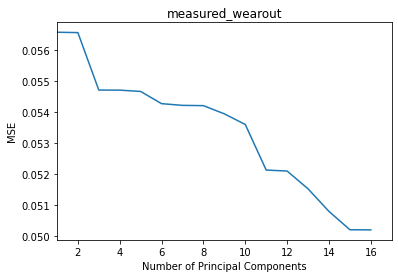

In [108]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 17):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,17])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

<AxesSubplot:>

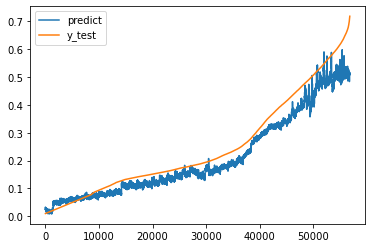

In [109]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)

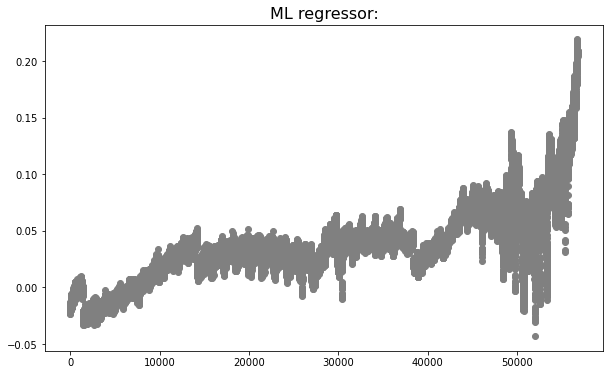

In [110]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

In [111]:
#Principal Component Analysis (Multi-linear Regression) after reduction to 13PCs

In [112]:
X_pca_train = pca.fit_transform(scale(X1_train))
X_pca_test = pca.transform(scale(X2_test))
print("X_pca_train")
print(X_pca_train[0:13])
print("X_pca_test")
print(X_pca_test[0:13])
print(X_pca_train.shape)

X_pca_train
[[-3.11427654e+00 -6.02813954e-01 -1.03591080e+00 -9.70286473e-01
  -1.03637373e-01  2.58235351e-01  1.20036029e-01  9.79644473e-03
   5.40021370e-01  3.10489388e-01  2.57668777e-01 -3.60442264e-02
  -1.94785610e-02  4.74703657e-02  1.47991606e-02  2.01504776e-03]
 [-3.10625861e+00  1.32785609e-01 -1.05238863e+00 -7.84222155e-01
  -1.43945854e-01  3.61207395e-03  1.03092593e+00 -1.25016156e-01
   6.35906394e-01  3.06458808e-01  2.73799505e-01 -1.49359696e-01
  -2.45756641e-02  4.05788913e-02  1.28500941e-02  1.69690709e-03]
 [-3.08417700e+00  3.46603712e-01 -1.07690022e+00 -2.89448023e-01
  -3.08007945e-01 -2.77039865e-01  1.13652822e+00  7.15668857e-01
   2.90076697e-01  3.21999014e-01  2.69779664e-01 -1.13572092e-01
  -2.29840621e-02  4.10811996e-02  1.50781688e-02  1.72378286e-03]
 [-3.03595232e+00 -7.93096798e-01 -9.13266502e-01 -1.13217550e+00
  -1.18673664e-01 -2.77433263e-02 -4.00714408e-02 -3.68072294e-01
   7.90508286e-01  3.26135921e-01  2.59298194e-01 -3.16473493

principle component = 1
mse_score 0.05657857
Coefficient of determination: 0.89339476
principle component = 2
mse_score 0.05656699
Coefficient of determination: 0.89343839
principle component = 3
mse_score 0.05471323
Coefficient of determination: 0.90030821
principle component = 4
mse_score 0.05471008
Coefficient of determination: 0.90031969
principle component = 5
mse_score 0.05466796
Coefficient of determination: 0.90047310
principle component = 6
mse_score 0.05427369
Coefficient of determination: 0.90190352
principle component = 7
mse_score 0.05421925
Coefficient of determination: 0.90210021
principle component = 8
mse_score 0.0542101
Coefficient of determination: 0.90213327
principle component = 9
mse_score 0.05394551
Coefficient of determination: 0.90308627
principle component = 10
mse_score 0.05360205
Coefficient of determination: 0.90431642
principle component = 11
mse_score 0.05213116
Coefficient of determination: 0.90949564
principle component = 12
mse_score 0.05209939
Coeffic

Text(0.5, 1.0, 'measured_wearout')

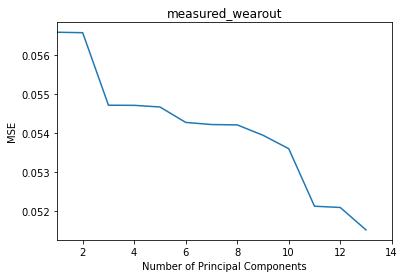

In [113]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 14):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,14])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

<AxesSubplot:>

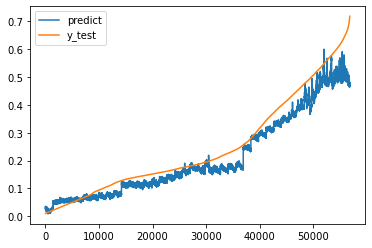

In [114]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)

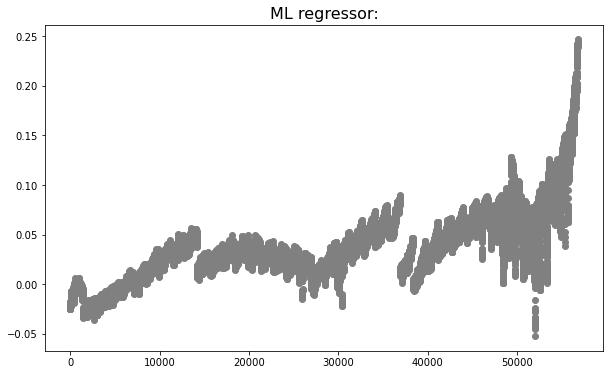

In [115]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

In [116]:
#Principal Component Analysis (Multi-linear Regression) after reduction to 3PCs

In [117]:
X_pca_train = pca.fit_transform(scale(X1_train))
X_pca_test = pca.transform(scale(X2_test))
print("X_pca_train")
print(X_pca_train[0:3])
print("X_pca_test")
print(X_pca_test[0:3])
print(X_pca_train.shape)

X_pca_train
[[-3.11427654e+00 -6.02813954e-01 -1.03591080e+00 -9.70286473e-01
  -1.03637373e-01  2.58235351e-01  1.20036029e-01  9.79644473e-03
   5.40021370e-01  3.10489388e-01  2.57668777e-01 -3.60442264e-02
  -1.94785610e-02  4.74703657e-02  1.47991606e-02  2.01504776e-03]
 [-3.10625861e+00  1.32785609e-01 -1.05238863e+00 -7.84222155e-01
  -1.43945854e-01  3.61207395e-03  1.03092593e+00 -1.25016156e-01
   6.35906394e-01  3.06458808e-01  2.73799505e-01 -1.49359696e-01
  -2.45756641e-02  4.05788913e-02  1.28500941e-02  1.69690709e-03]
 [-3.08417700e+00  3.46603712e-01 -1.07690022e+00 -2.89448023e-01
  -3.08007945e-01 -2.77039865e-01  1.13652822e+00  7.15668857e-01
   2.90076697e-01  3.21999014e-01  2.69779664e-01 -1.13572092e-01
  -2.29840621e-02  4.10811996e-02  1.50781688e-02  1.72378286e-03]]
X_pca_test
[[-3.11427664e+00 -6.02813937e-01 -1.03590985e+00 -9.70286398e-01
  -1.03637347e-01  2.58235541e-01  1.20036097e-01  9.79640243e-03
   5.40021194e-01  3.10490355e-01  2.57668673e-01

principle component = 1
mse_score 0.05657857
Coefficient of determination: 0.89339476
principle component = 2
mse_score 0.05656699
Coefficient of determination: 0.89343839
principle component = 3
mse_score 0.05471323
Coefficient of determination: 0.90030821


Text(0.5, 1.0, 'measured_wearout')

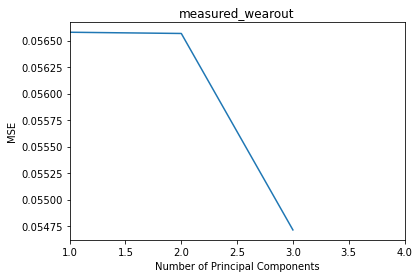

In [118]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 4):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,4])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

<AxesSubplot:>

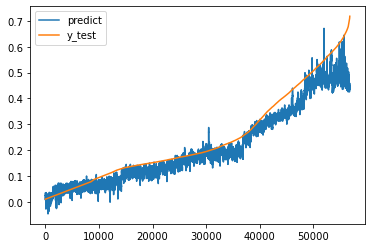

In [119]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)

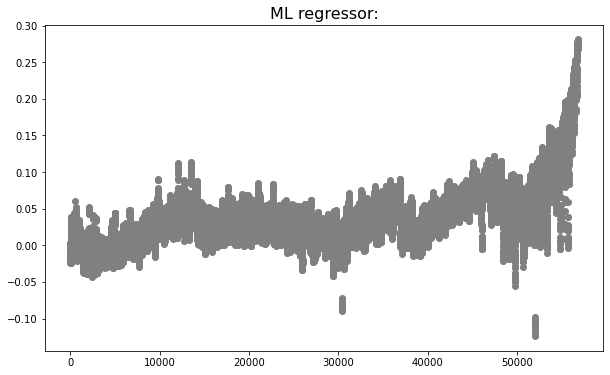

In [120]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()

In [121]:
#Principal Component Analysis (Multi-linear Regression) after reduction to 8PCs

In [122]:
X_pca_train = pca.fit_transform(scale(X1_train))
X_pca_test = pca.transform(scale(X2_test))
print("X_pca_train")
print(X_pca_train[0:8])
print("X_pca_test")
print(X_pca_test[0:8])
print(X_pca_train.shape)

X_pca_train
[[-3.11427654e+00 -6.02813954e-01 -1.03591080e+00 -9.70286473e-01
  -1.03637373e-01  2.58235351e-01  1.20036029e-01  9.79644473e-03
   5.40021370e-01  3.10489388e-01  2.57668777e-01 -3.60442264e-02
  -1.94785610e-02  4.74703657e-02  1.47991606e-02  2.01504776e-03]
 [-3.10625861e+00  1.32785609e-01 -1.05238863e+00 -7.84222155e-01
  -1.43945854e-01  3.61207395e-03  1.03092593e+00 -1.25016156e-01
   6.35906394e-01  3.06458808e-01  2.73799505e-01 -1.49359696e-01
  -2.45756641e-02  4.05788913e-02  1.28500941e-02  1.69690709e-03]
 [-3.08417700e+00  3.46603712e-01 -1.07690022e+00 -2.89448023e-01
  -3.08007945e-01 -2.77039865e-01  1.13652822e+00  7.15668857e-01
   2.90076697e-01  3.21999014e-01  2.69779664e-01 -1.13572092e-01
  -2.29840621e-02  4.10811996e-02  1.50781688e-02  1.72378286e-03]
 [-3.03595232e+00 -7.93096798e-01 -9.13266502e-01 -1.13217550e+00
  -1.18673664e-01 -2.77433263e-02 -4.00714408e-02 -3.68072294e-01
   7.90508286e-01  3.26135921e-01  2.59298194e-01 -3.16473493

principle component = 1
mse_score 0.05657857
Coefficient of determination: 0.89339476
principle component = 2
mse_score 0.05656699
Coefficient of determination: 0.89343839
principle component = 3
mse_score 0.05471323
Coefficient of determination: 0.90030821
principle component = 4
mse_score 0.05471008
Coefficient of determination: 0.90031969
principle component = 5
mse_score 0.05466796
Coefficient of determination: 0.90047310
principle component = 6
mse_score 0.05427369
Coefficient of determination: 0.90190352
principle component = 7
mse_score 0.05421925
Coefficient of determination: 0.90210021
principle component = 8
mse_score 0.0542101
Coefficient of determination: 0.90213327


Text(0.5, 1.0, 'measured_wearout')

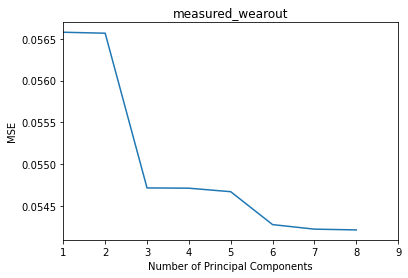

In [123]:
#define an empty array for mse_score
from sklearn.metrics import r2_score
mse_score = []
pca_number = []
#using different numbers of PCA to train and test model
#train PCR model on training data
for i in np.arange(1, 9):
    regr = LinearRegression()
    regr.fit(X_pca_train[:,:i], y_train)
    #predict and calculate RMSE
    pred = regr.predict(X_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(8))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(8))
    print("Coefficient of determination: %.8f" % r2_score(y_test, pred))
# Plot results
plt.xlim([1,9])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured_wearout')

<AxesSubplot:>

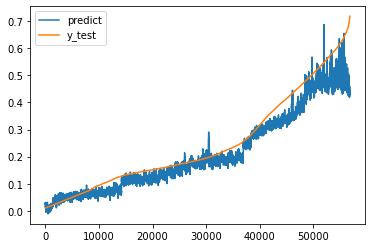

In [124]:
#Line plot comparing y_test and y_pred
y_test1 = y_test.reset_index()
y_test2= y_test1["measured_wearout"]
y_test2
df2 = pd.DataFrame()
df2["y_test"] = pd.DataFrame(y_test2)
df2["predict"] = pred
df2["predict"].plot(legend = True)
df2["y_test"].plot(legend = True)

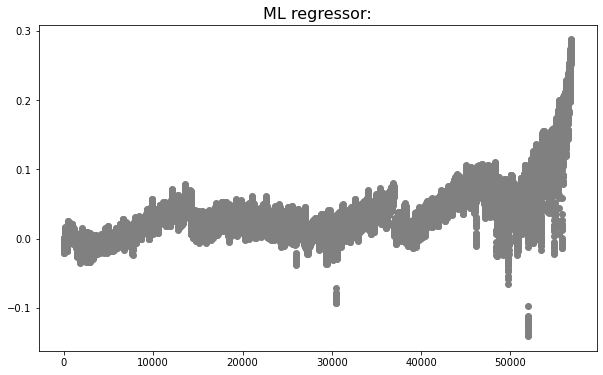

In [125]:
#Erro Analysis
index_list = []
for i in range(0, len(pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_test-pred, c='grey')


plt.show()